In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [9]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data_2 import load_cd_data

config_name = 'complex_32x128_120'
config = importlib.import_module(f"config.{config_name}")
vit = load_model_config(config)
vit_data = load_cd_data()

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader)

Split: time,120.0; Training: 19921; Validation: 2214; Testing: 4427


In [10]:
device = trainer.device
vit = trainer.vit

In [11]:
trainer.setup()

Creating directory: output/complex_32x128_120_20220531_5a69...


In [12]:
vit.load_state_dict(torch.load('output/complex_32x128_120_20220526_45b2/model.torch',
                               map_location=torch.device('cpu')))

<All keys matched successfully>

In [13]:
trainer.compute_predictions_losses()

In [14]:
print(trainer.perf_str)

Loss:
  Train:	0.052
  Valid:	0.046
  Test: 	0.409

R2:
  Train:	0.949
  Valid:	0.955
  Test: 	0.543


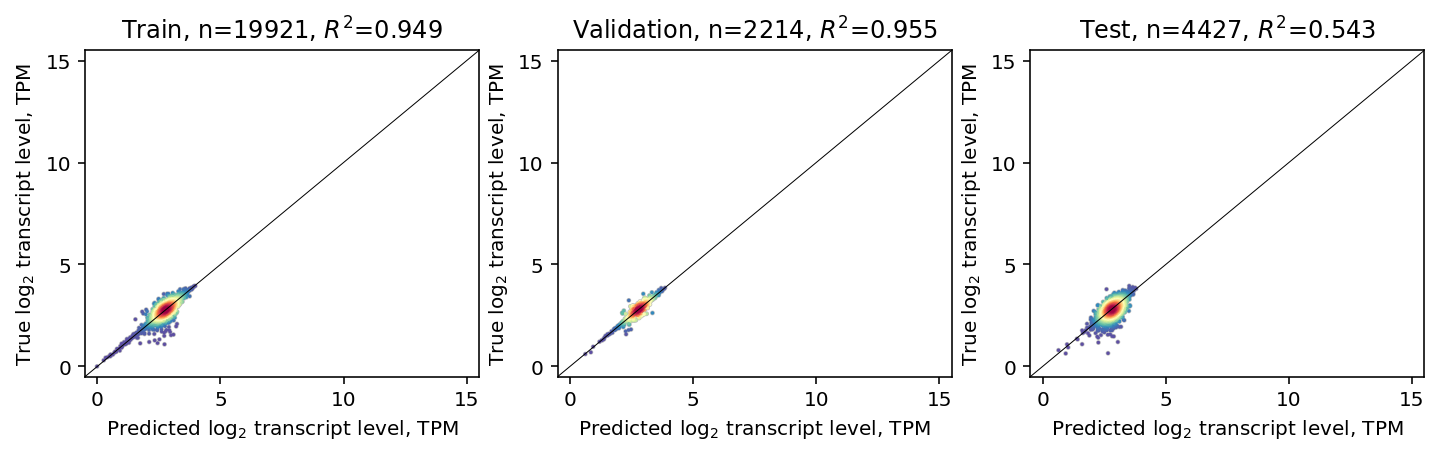

In [15]:
trainer.plot_predictions()

In [16]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()


0

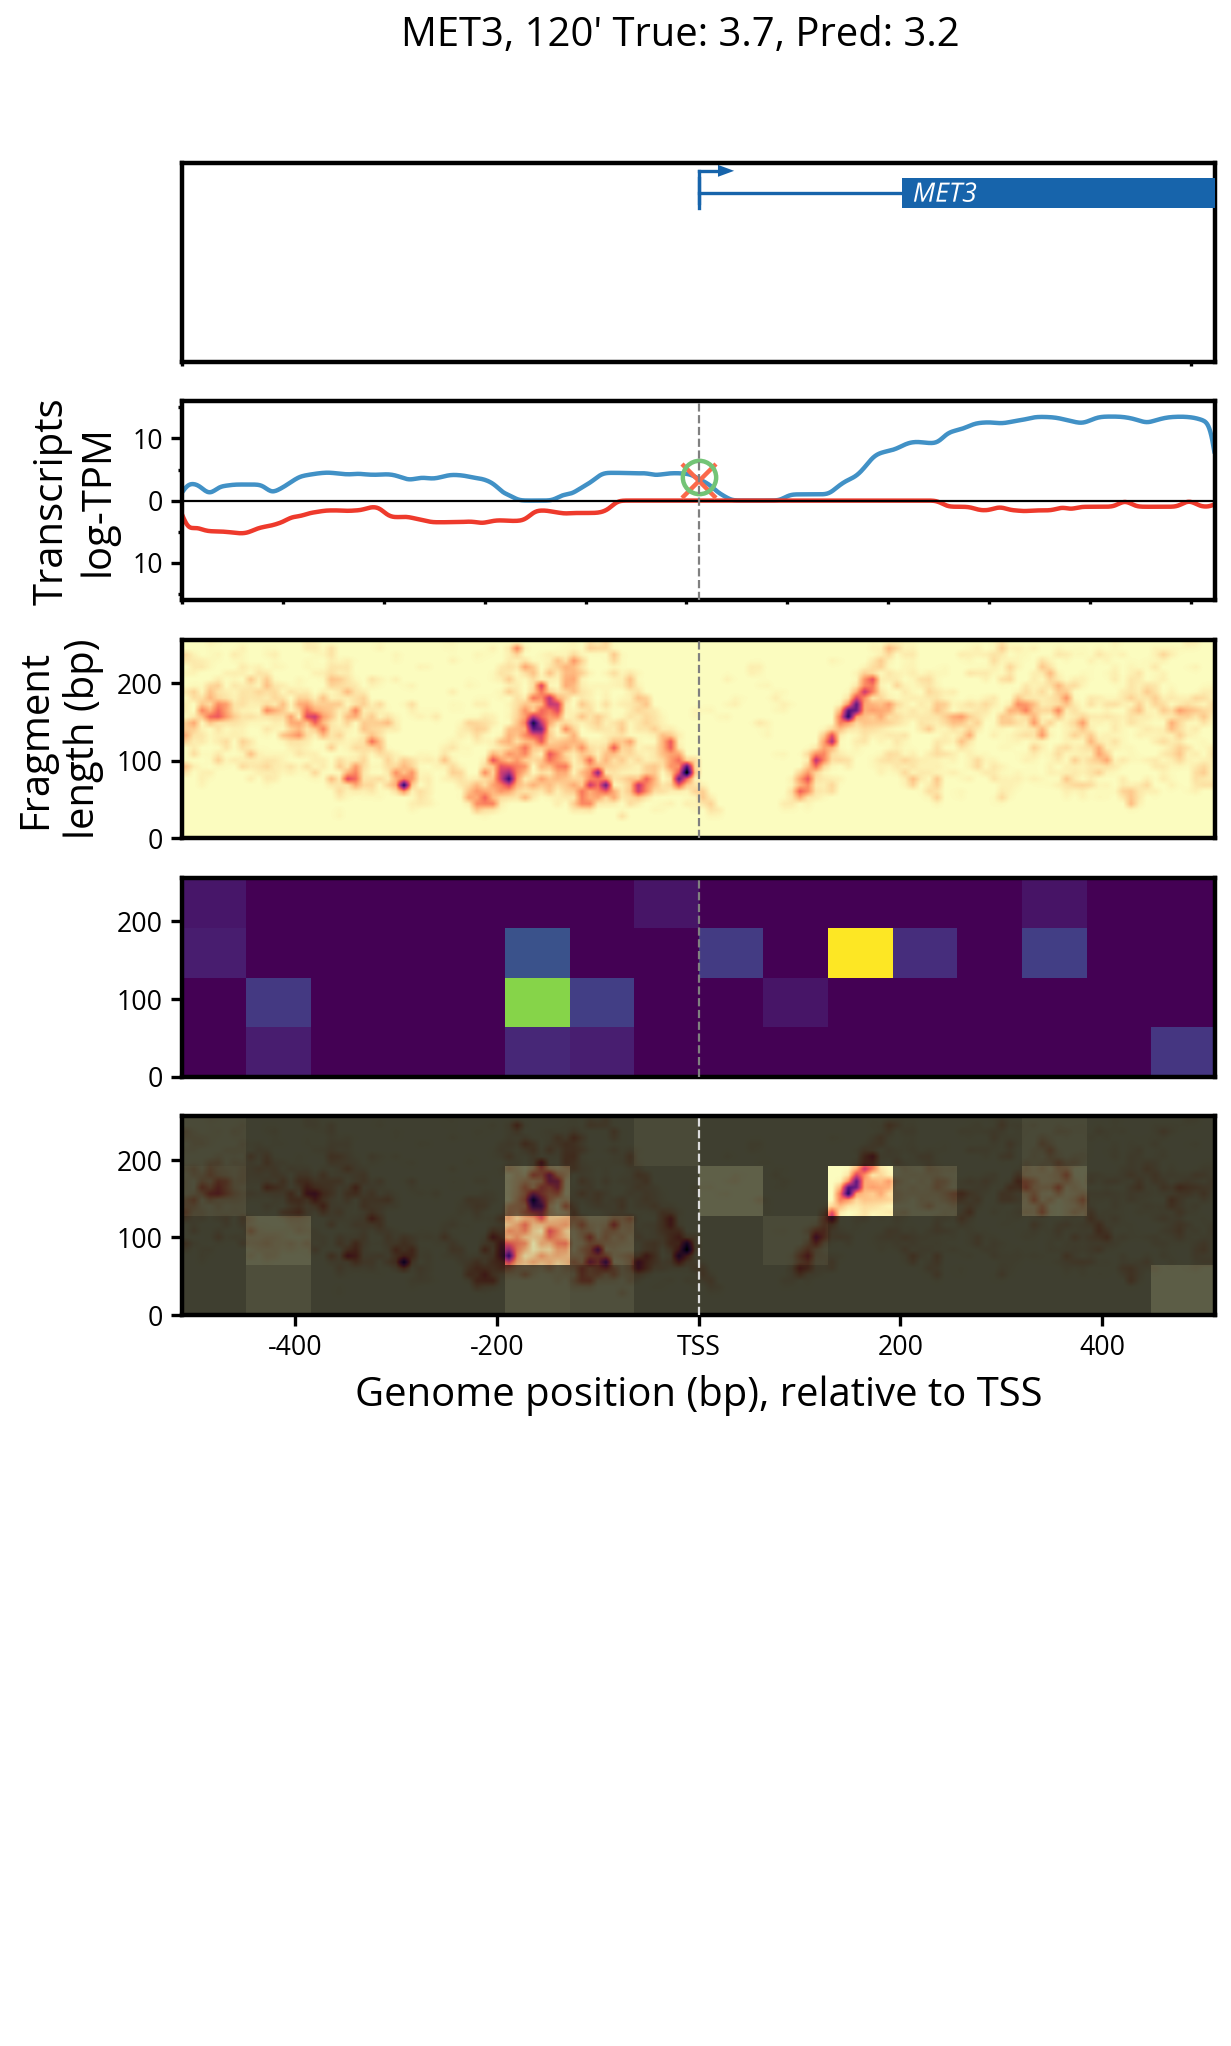

In [19]:
from src.vit_viz import plot_gene_prediction

plot_gene_prediction('MET3', 120.0, trainer.vit, trainer.dataloader.dataset,
    orf_plotter=orf_plotter, rna_plotter=rna_plotter)
0